In [3]:
from sklearn import svm
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from os import listdir
import re

rf = re.compile('.*f.*')
rs = re.compile(".*s.*")
rb = re.compile(".*b.*")
files = os.listdir("../tmp/images/")
first  = [x for x in files if rf.match(x)]
second = [x for x in files if rs.match(x)]
both   = [x for x in files if rb.match(x)]
first

['181018-f13.jpg',
 '61086-f17.jpg',
 '22013-f17.jpg',
 '65010-f23.jpg',
 '61086-f23.jpg',
 '22013-f23.jpg',
 '65010-f17.jpg',
 '65010-f13.jpg',
 '61086-f13.jpg',
 '22013-f13.jpg']

(321, 481)


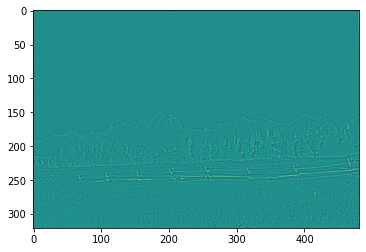

In [5]:
image = cv.imread("../tmp/BSDS300/images/train/2092.jpg", cv.IMREAD_GRAYSCALE)
print(image.shape)
factualTruth = cv.Canny(image, 200, 200)
plt.imshow(factualTruth)

In [72]:
# data preprocessing
from sklearn.utils import resample

y_raw = np.array(factualTruth).flatten()
f23 = cv.imread("../tmp/images/2092-f23.jpg", cv.IMREAD_GRAYSCALE)
s13 = cv.imread("../tmp/images/2092-s13.jpg", cv.IMREAD_GRAYSCALE)
b23 = cv.imread("../tmp/images/2092-b23.jpg", cv.IMREAD_GRAYSCALE)
# own images zipped in tuples (a, b, c) for each pixel
X_raw = np.array(list(zip(np.array(f23).flatten(), np.array(s13).flatten(), np.array(b23).flatten())))

def equal_samples(X_raw, y_raw):
    smallest_class_amount = min(len([i for i in y_raw if i == 255]), len([i for i in y_raw if i == 255]))
    w_counter = 0
    b_counter = 0
    X, y = [], []

    for i in range(len(X_raw)):
        if w_counter >= smallest_class_amount and b_counter >= smallest_class_amount:
            break
        if w_counter >= smallest_class_amount and y_raw[i] > 200:
            continue
        if b_counter >= smallest_class_amount and y_raw[i] < 200:
            continue
        if y_raw[i] > 200:
            w_counter += 1
        else:
            b_counter += 1
        X.append(X_raw[i])
        y.append(y_raw[i])
    return (X, y)

X, y = equal_samples(X_raw, y_raw)

print(b_counter)
print(w_counter)

print(X[idx], y[idx])

5246
5246
[ 2  9 28] 255


In [68]:
clf = svm.SVC()
clf.fit(X, y)

SVC()

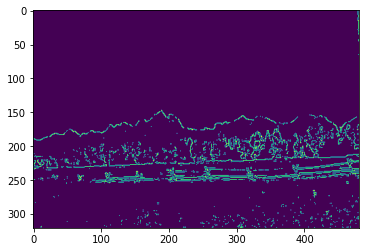

In [92]:
image = cv.imread("../tmp/BSDS300/images/train/2092.jpg", cv.IMREAD_GRAYSCALE)
y_test = cv.Canny(image, 200, 200)
dims = y_test.shape
plt.imshow(y_test)
y_test = np.array(y_test).flatten()

f23_test = cv.imread("../tmp/images/2092-f23.jpg", cv.IMREAD_GRAYSCALE)
s13_test = cv.imread("../tmp/images/2092-s13.jpg", cv.IMREAD_GRAYSCALE)
b23_test = cv.imread("../tmp/images/2092-b23.jpg", cv.IMREAD_GRAYSCALE)
# own images zipped in tuples (a, b, c) for each pixel
X_test = np.array(list(zip(np.array(f23).flatten(), np.array(s13).flatten(), np.array(b23).flatten())))

0.6751316377484602


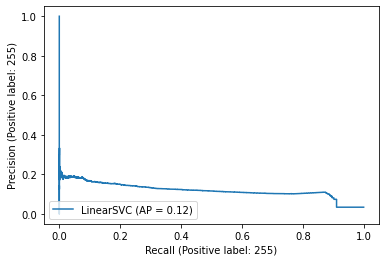

In [94]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="LinearSVC"
)

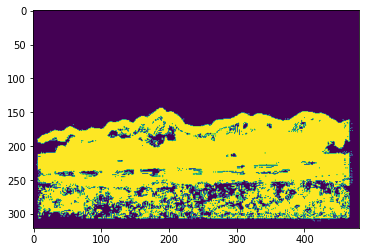

In [98]:
recreated = y_pred.reshape(dims)
plt.imshow(recreated)